<a href="https://colab.research.google.com/github/XYexa/Data-Analysis-Bogota/blob/main/Copy_of_Return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# @title Package installation { display-mode: "both" }
!pip install pandas_datareader
!pip install pulp
!pip install yfinance
!pip install sie_banxico

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
#pip install pandas_datareader –––-> Para instalar el paquete pandas_datereader.
from pandas_datareader import data
from pulp import *
from sie_banxico import SIEBanxico

In [56]:

# Replace with the correct series ID
api = SIEBanxico(token = 'cfbd9b115f4fe301b9a79a819d041ef9a8630b4bac4c8be3619551266fa54dc6' , id_series = ['SF116766'], language = 'en')
api.set_token(token = 'x')

# Check the series ID
try:
    series_metadata = api.get_metadata()
    print(series_metadata)
except Exception as e:
    print(e)


{'bmx': {'series': [{'idSerie': 'SF116766', 'titulo': 'Unit Total price', 'fechaInicio': '09/02/2010', 'fechaFin': '11/01/2023', 'periodicidad': 'Daily', 'cifra': 'Percentages', 'unidad': 'Percentages', 'versionada': False}]}}


In [55]:
df_cetes = api.get_metadata()

{'bmx': {'series': [{'idSerie': 'SF116766', 'titulo': 'Unit Total price', 'fechaInicio': '10/10/2010', 'fechaFin': '10/10/2023', 'periodicidad': 'Daily', 'cifra': 'Percentages', 'unidad': 'Percentages', 'versionada': False}]}}

{'bmx': {'series': [{'idSerie': 'SF116766',
    'titulo': 'Unit Total price',
    'fechaInicio': '10/10/2010',
    'fechaFin': '10/10/2023',
    'periodicidad': 'Daily',
    'cifra': 'Percentages',
    'unidad': 'Percentages',
    'versionada': False}]}}

In [53]:
df_cetes = pd.DataFrame ()
print(df_cetes)

Empty DataFrame
Columns: []
Index: []


In [57]:
from re import S
# Importing data from assets
activos = ["UOPIX", "^GSPC", "CEMEXCPO.MX"]
df = yf.download(activos, start="2020-10-11", end="2023-10-10")
df= df["Adj Close"]
df.head(5)


[*********************100%%**********************]  3 of 3 completed


,CEMEXCPO.MX,UOPIX,^GSPC
Date,,,
2020-10-12,8.38,55.627060,3534.219971
2020-10-13,8.26,55.589970,3511.929932
2020-10-14,8.47,54.673794,3488.669922
2020-10-15,8.77,53.891148,3483.340088
2020-10-16,8.69,53.420082,3483.810059


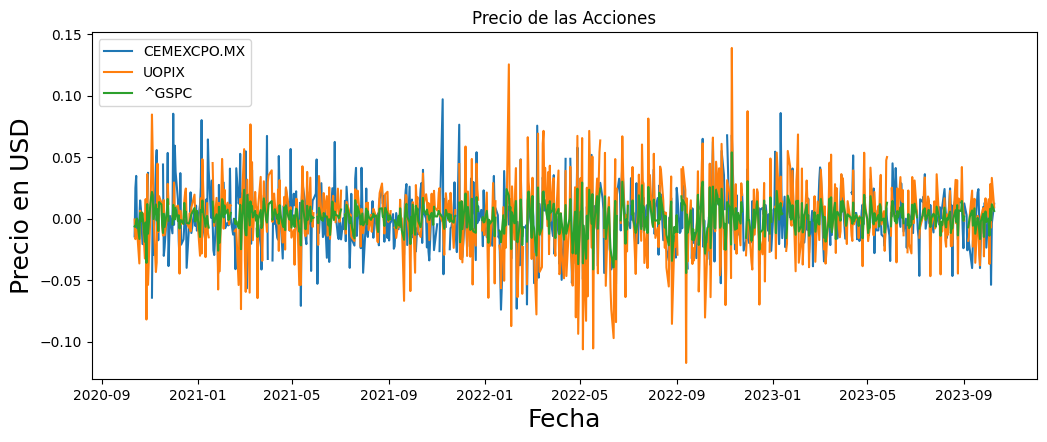

In [59]:
# Action close price plot
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.savefig('plotprecios.png', dpi=300, bbox_inches='tight')
plt.show()

# Logaritmic returns


In [58]:
df = np.log(df).diff()
df_log = df.dropna()
df_log

,CEMEXCPO.MX,UOPIX,^GSPC
Date,,,
2020-10-13,-0.014423,-0.000667,-0.006327
2020-10-14,0.025106,-0.016618,-0.006645
2020-10-15,0.034806,-0.014418,-0.001529
2020-10-16,-0.009164,-0.008779,0.000135
2020-10-19,0.000000,-0.036414,-0.016465
...,...,...,...
2023-10-03,-0.033811,-0.036839,-0.013839
2023-10-04,0.019714,0.028108,0.008077
2023-10-05,-0.053772,-0.007229,-0.001305


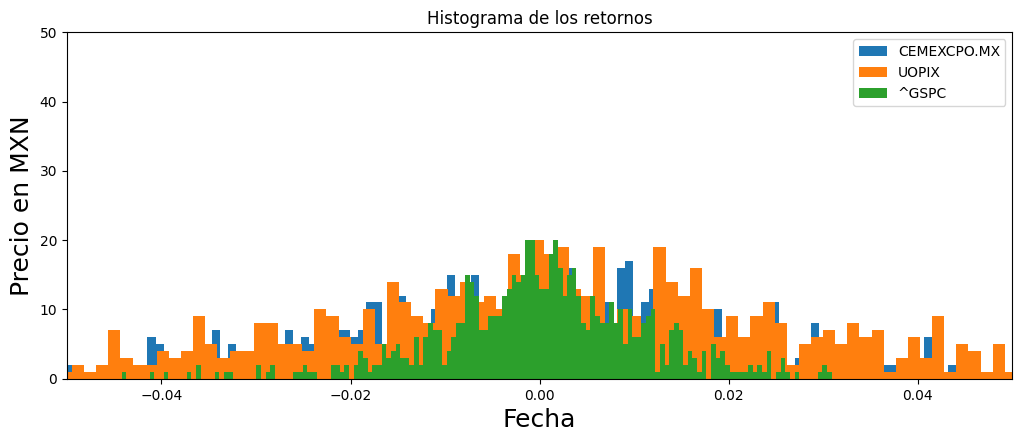

In [60]:
# Return histogram
# Normality distribution of data
plt.figure(figsize=(12.2,4.5))
for i in df.columns.values:
    plt.hist( df_log[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en MXN',fontsize=18)
plt.legend(df_log.columns.values)
plt.xlim((-.05,.05))
plt.ylim((0,50))
plt.savefig('plotretornosnormales.png', dpi=300, bbox_inches='tight')
plt.show()

### General risk measurements:

Mean

Std

Var

In [ ]:
Expected_return= (df_log.mean())*100
Expected_return

AAPL           0.054448
AMXB.MX        0.033737
AMZN          -0.059585
BIMBOA.MX      0.096252
CEMEXCPO.MX    0.050978
DIS           -0.047335
KOFUBL.MX      0.086851
TSLA           0.043977
dtype: float64

In [ ]:
Expected_net_risk= (df_log.var())*100
Expected_net_risk

AAPL           0.033251
AMXB.MX        0.028036
AMZN           0.057593
BIMBOA.MX      0.037300
CEMEXCPO.MX    0.060713
DIS            0.041423
KOFUBL.MX      0.018150
TSLA           0.137644
dtype: float64

In [ ]:
Expected_risk= (df_log.std())*100
Expected_risk

AAPL           1.823485
AMXB.MX        1.674397
AMZN           2.399846
BIMBOA.MX      1.931330
CEMEXCPO.MX    2.463993
DIS            2.035267
KOFUBL.MX      1.347208
TSLA           3.710036
dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


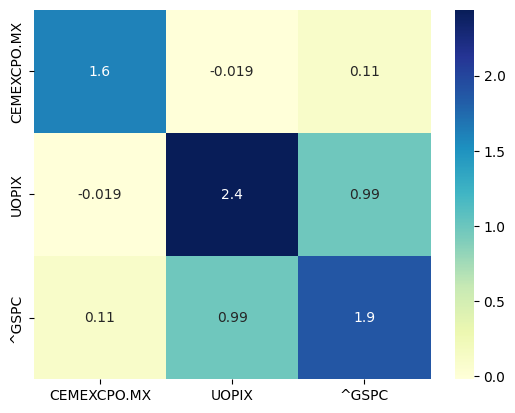

In [61]:
# @title Covariance
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix
covplot = sns.heatmap(cov_matrix, cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

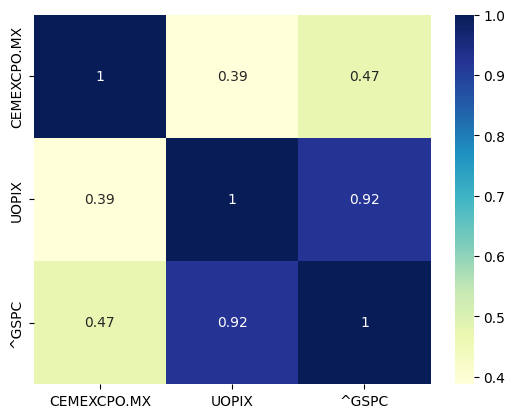

In [62]:
df_corr= df.pct_change().apply(lambda x: np.log(1+x)).corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df_log.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
# NUMBER OF OBSERVATIONS
n_obs= df.shape[0]  # Gives number of rows
n_assets = df.shape[1]  # Gives number of columns

return_vec = np.random.randn(n_assets, n_obs)
n_obs

#Varianza, devest, asignaci[on de activos

776

In [63]:
# Randomly weighted portfolio's variance
w = {"UOPIX": 0.33,
     "^GSPC": 0.33,
     "CEMEXCPO.MX": 0.33,}

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.879046733993554

# Portfolio Expected returns


In [64]:
# Yearly returns for individual companies

def ind_er(df):
    df = df.resample('Y').last()
    df.replace(0, 0.001, inplace=True)
    return df.pct_change().mean()

print(ind_er(df.copy()))

CEMEXCPO.MX    1.998848
UOPIX         -3.123349
^GSPC         -1.637489
dtype: float64


In [66]:
#Portfolio expected returns
w = [.33,.33,.33]
port_er = (w*ind_er(df)).sum()
#port_er = sum([w[i] * ind_er(df) for i in range(len(w))])
print(port_er)

-0.9114562814950131


# Plotting the efficient frontier


Shows the maximum return we can get for a set of volatility, or the volatility wee need to get a level of returns
*   Y-axis: Graph with returns
*   X-axis: Volatility


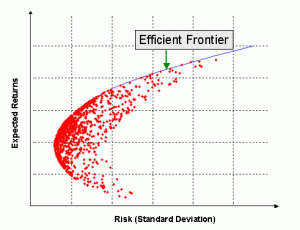



In [67]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
# We replaced cero values with a loop to calculate volatility eith the minimum value found in the dataframe

def ann_sd(df):
    df.replace(0, 0.001, inplace=True)
    return df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

ann_sd(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


CEMEXCPO.MX    21.005374
UOPIX          25.215797
^GSPC          21.643867
dtype: float64

In [68]:
#Amazon has the highest risk, given as volatility
assets = pd.concat([ind_er(df), ann_sd(df)], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Returns,Volatility
CEMEXCPO.MX,1.998848,21.005374
UOPIX,-3.123349,25.215797
^GSPC,-1.637489,21.643867


In [69]:
#We run a loop which will consider random weights a 1000 times to determine the optimal portfolio wight
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [70]:
for portfolio in range(num_portfolios):
# To get random numbers for weights, we use the np.random.random()
    weights = np.random.random(num_assets)
# Remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er(df)) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [71]:
import statistics as st
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 data[symbol+' weight'] = [w[counter] for w in p_weights]

if len(p_ret) != len(p_vol):
    # Append mean values to the list with smaller length
    if len(p_vol) > len(p_ret):
        mean_width = st.mean(p_vol)
        p_vol += (len(p_vol)-len(p_ret)) * [mean_width]
    elif len(p_ret) < len(p_vol):
        mean_length = st.mean(p_ret)
        p_vol += (len(p_ret)-len(p_vol)) * [mean_length]

portfolios  = pd.DataFrame(data)

portfolios.head()

,Returns,Volatility,CEMEXCPO.MX weight,UOPIX weight,^GSPC weight
0,-2.318085,19.600794,0.008400,0.478607,0.512992
1,-2.192090,19.143706,0.114994,0.654677,0.230330
2,-2.467877,20.062001,0.004584,0.570078,0.425338
3,-0.632702,15.430750,0.468311,0.469863,0.061826
4,-1.389655,16.713035,0.301718,0.571597,0.126685


In [72]:
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,CEMEXCPO.MX weight,UOPIX weight,^GSPC weight
0,-2.318085,19.600794,0.008400,0.478607,0.512992
1,-2.192090,19.143706,0.114994,0.654677,0.230330
2,-2.467877,20.062001,0.004584,0.570078,0.425338
3,-0.632702,15.430750,0.468311,0.469863,0.061826
4,-1.389655,16.713035,0.301718,0.571597,0.126685


<Axes: xlabel='Volatility', ylabel='Returns'>

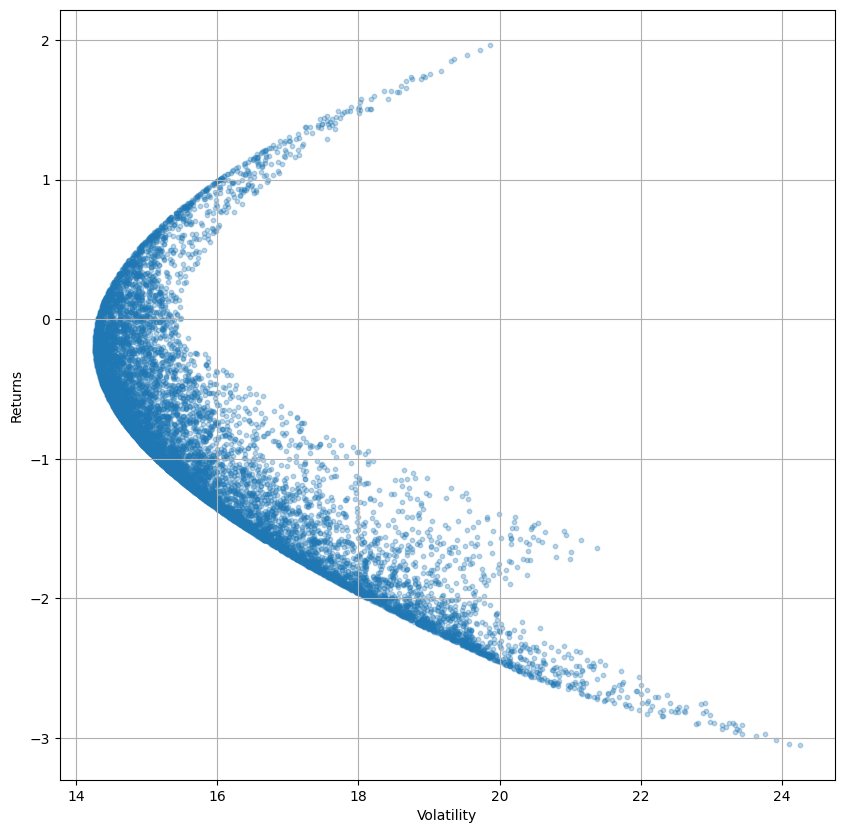

In [73]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Minimum volatility portfolio

In [74]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns               -0.186160
Volatility            14.265255
CEMEXCPO.MX weight     0.489009
UOPIX weight           0.219990
^GSPC weight           0.291001
Name: 4172, dtype: float64

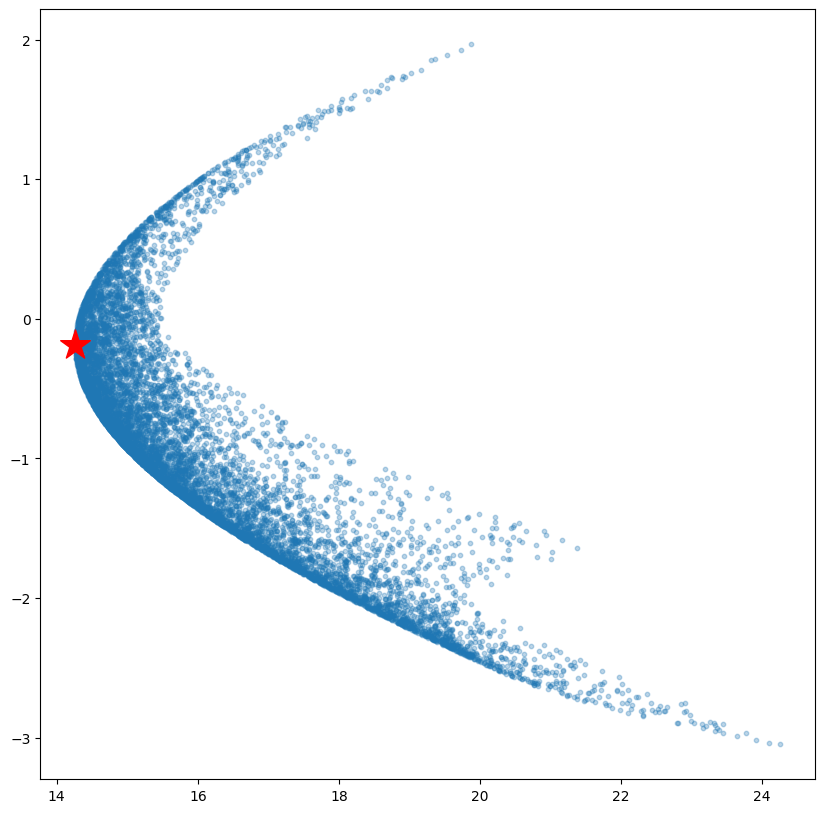

In [75]:
# plotting the minimum volatility portfolio
#The red star denotes the most efficient portfolio with minimum volatility.
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# Sharpe Ratio

Average return earned in excess of the risk-free rate per unit of volatility or total risk.
Optimal risky portfolio: the one that has the **highest** shape ratio.

**Formula:**


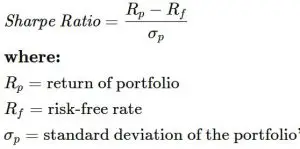



# Optimal Portfolio

In [76]:
# Finding the optimal portfolio
# We define the risk-free rate to be 1% or 0.01.
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                1.966094
Volatility            19.871854
CEMEXCPO.MX weight     0.991972
UOPIX weight           0.002398
^GSPC weight           0.005630
Name: 9621, dtype: float64

> ***IDEAL PORTFOLIO***


---




**Returns                49.43 %**

**Volatility            12.566837**

**Weights:**

Returns                1.966094
Volatility            19.871854
CEMEXCPO.MX weight     0.991972
UOPIX weight           0.002398
^GSPC weight           0.005630

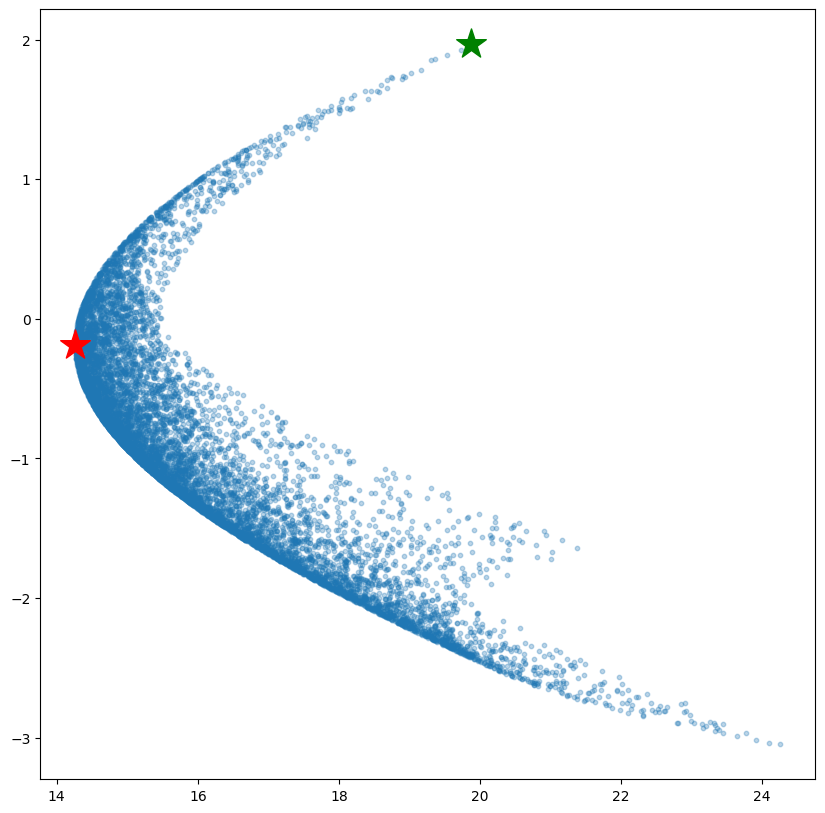

In [77]:
# Plotting optimal portfolio
# The green star represents the optimal risky portfolio.
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)